In [3]:
forest <- read.csv("forestfires.csv")
head(forest)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
str(forest)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


# Initial Data Visualizations


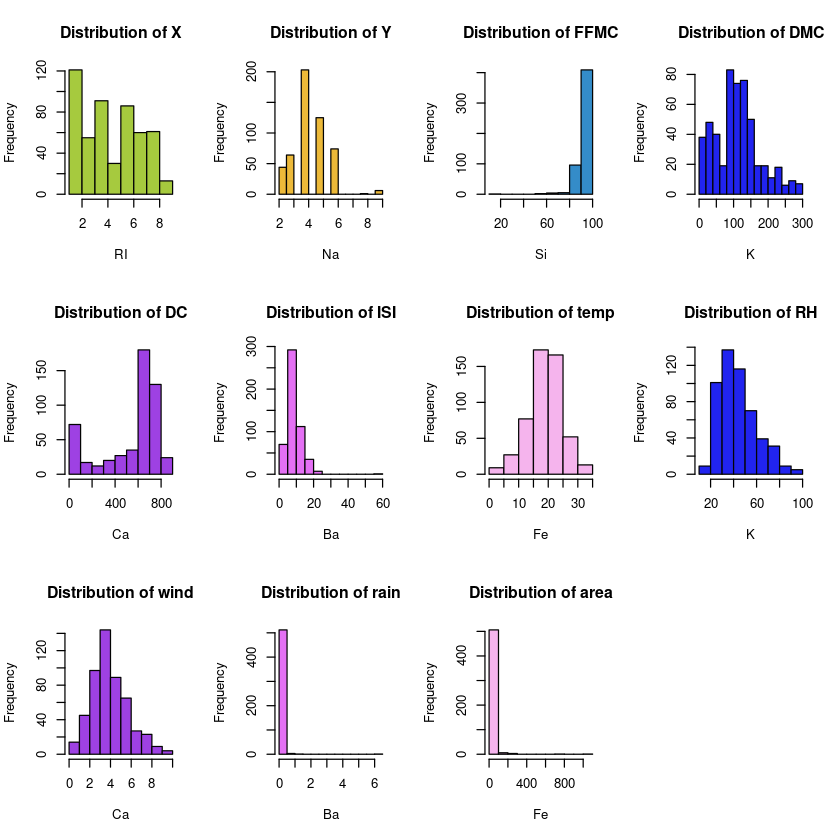

In [5]:
par(mfrow = c(3,4))

# Discrete variables X and Y

hist(forest$X, main="Distribution of X", xlab="RI", col="#a6ca3e", border="#030303")   #RI

hist(forest$Y, main="Distribution of Y", xlab="Na", col="#ecb939", border="#030303")   #Na

# Remaining categorical variables

hist(forest$FFMC, main="Distribution of FFMC", xlab="Si", col="#348cc9", border="#030303")   #Si

hist(forest$DMC, main="Distribution of DMC", xlab="K", col="#2124ef", border="#030303")   #K

hist(forest$DC, main="Distribution of DC", xlab="Ca", col="#9e41e3", border="#030303")   #Ca

hist(forest$ISI, main="Distribution of ISI", xlab="Ba", col="#e470f4", border="#030303")   #Ba

hist(forest$temp, main="Distribution of temp", xlab="Fe", col="#f5b4ed", border="#030303")   #Fe

hist(forest$RH, main="Distribution of RH", xlab="K", col="#2124ef", border="#030303")   #K

hist(forest$wind, main="Distribution of wind", xlab="Ca", col="#9e41e3", border="#030303")   #Ca

hist(forest$rain, main="Distribution of rain", xlab="Ba", col="#e470f4", border="#030303")   #Ba

hist(forest$area, main="Distribution of area", xlab="Fe", col="#f5b4ed", border="#030303")   #Fe

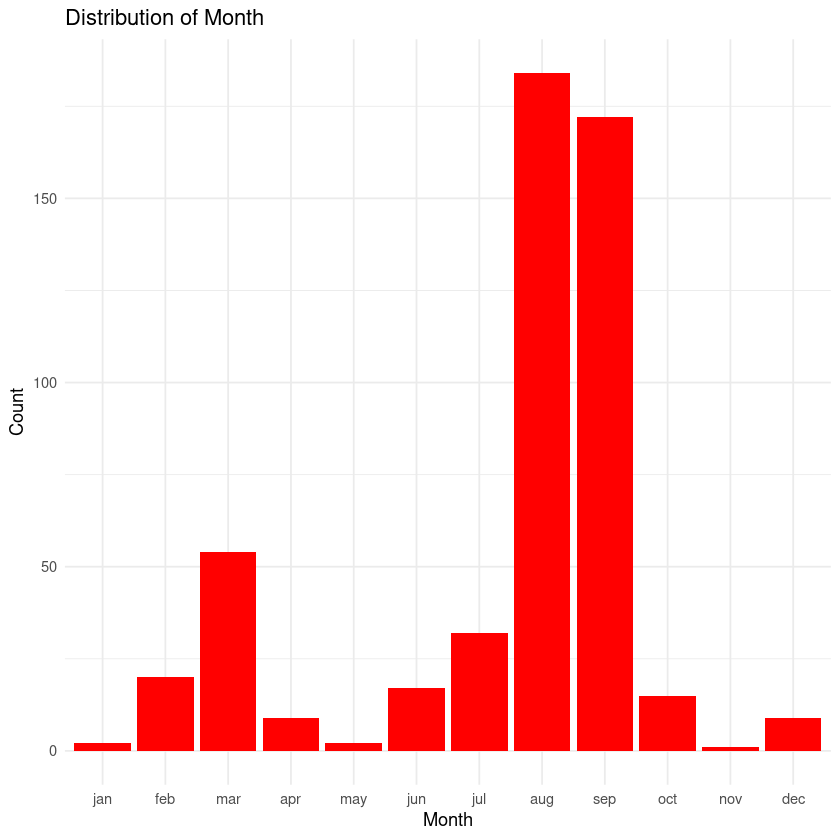

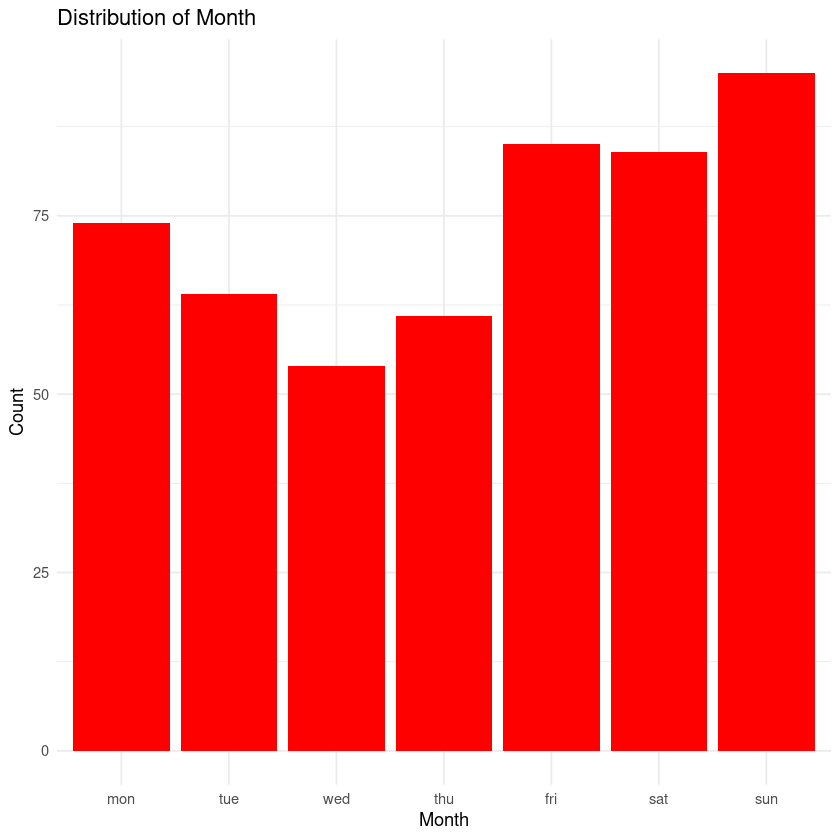

In [6]:
# par(mfrow =c(1,2))
forest$month <- factor(forest$month, 
                     levels = c("jan", "feb", "mar", "apr", "may", "jun", 
                                "jul", "aug", "sep", "oct", "nov", "dec"))

library(ggplot2)
ggplot(forest, aes(x = month)) +
  geom_bar(fill = "red") +
  labs(title = "Distribution of Month", x = "Month", y = "Count") +
  theme_minimal()


forest$day <- factor(forest$day, 
                     levels = c("mon", "tue", "wed", "thu", "fri", "sat", "sun"))

library(ggplot2)
ggplot(forest, aes(x = day)) +
  geom_bar(fill = "red") +
  labs(title = "Distribution of Month", x = "Month", y = "Count") +
  theme_minimal()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


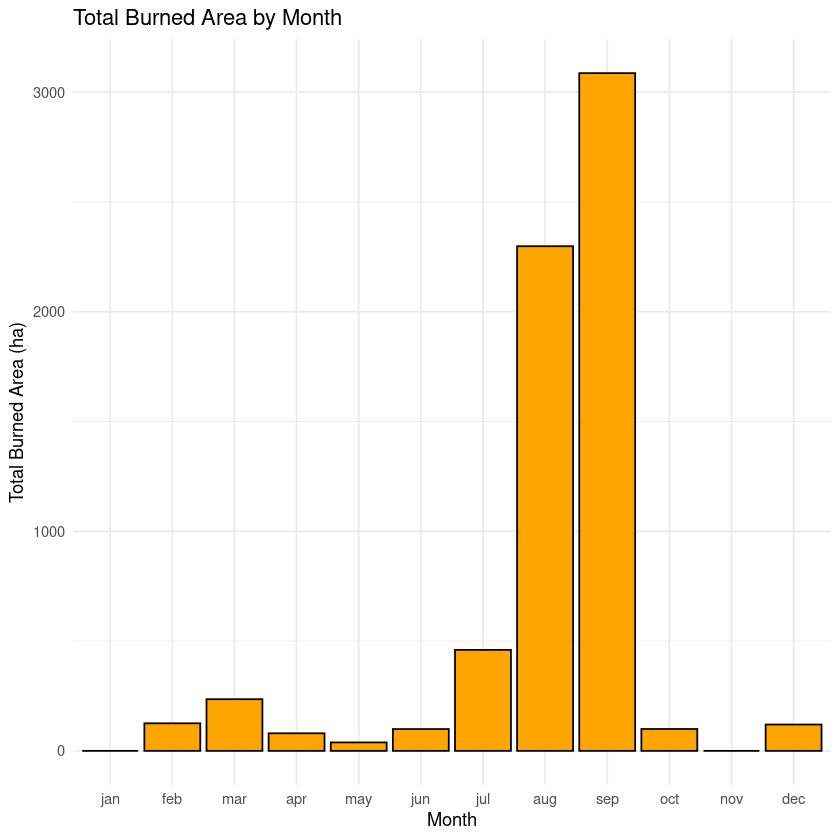

In [7]:
library(tidyverse)
forest$month <- factor(forest$month, 
                     levels = c("jan", "feb", "mar", "apr", "may", "jun", 
                                "jul", "aug", "sep", "oct", "nov", "dec"))

burned_area_by_month <- forest %>%
  group_by(month) %>%
  summarise(area = sum(area))

ggplot(burned_area_by_month, aes(x = month, y = area)) +
  geom_bar(stat = "identity", fill = "orange", color = "black") +
  labs(title = "Total Burned Area by Month", 
       x = "Month", 
       y = "Total Burned Area (ha)") +
  theme_minimal()

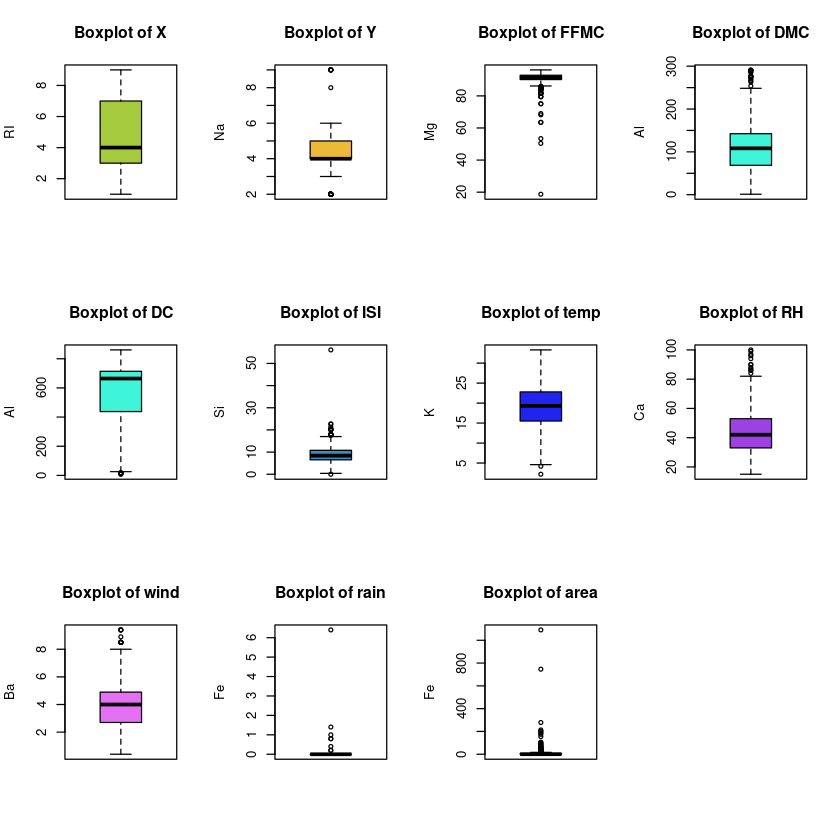

In [8]:
par(mfrow =c(3,4))

boxplot(forest$X, main="Boxplot of X", ylab="RI", col="#a6ca3e")   #RI

boxplot(forest$Y, main="Boxplot of Y", ylab="Na", col="#ecb939")   #Na

boxplot(forest$FFMC, main="Boxplot of FFMC", ylab="Mg", col="#30f045")   #Mg

boxplot(forest$DMC, main="Boxplot of DMC", ylab="Al", col="#3ef5da")   #Al

boxplot(forest$DC, main="Boxplot of DC", ylab="Al", col="#3ef5da")   #Al

boxplot(forest$ISI, main="Boxplot of ISI", ylab="Si", col="#348cc9")   #Si

boxplot(forest$temp, main="Boxplot of temp", ylab="K", col="#2124ef")   #K

boxplot(forest$RH, main="Boxplot of RH", ylab="Ca", col="#9e41e3")   #Ca

boxplot(forest$wind, main="Boxplot of wind", ylab="Ba", col="#e470f4")   #Ba

boxplot(forest$rain, main="Boxplot of rain", ylab="Fe", col="#f5b4ed")   #Fe

boxplot(forest$area, main="Boxplot of area", ylab="Fe", col="#f5b4ed")   #Fe

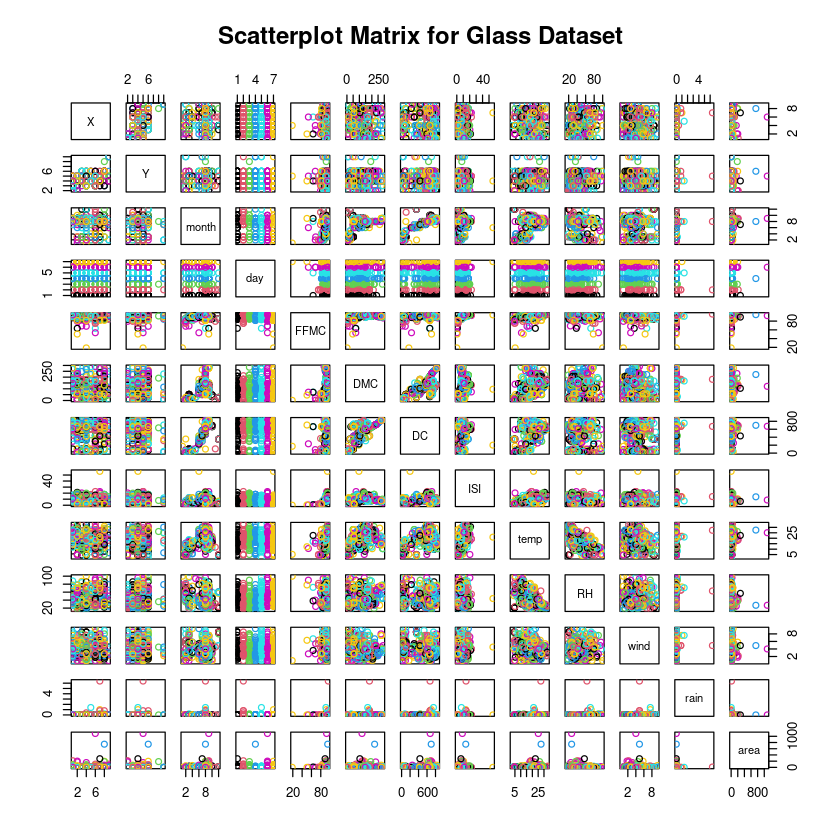

In [9]:
pairs(forest, main = "Scatterplot Matrix for Glass Dataset", col = forest$day)

corrplot 0.92 loaded



ERROR: Error in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, : invalid color name 'Blank'


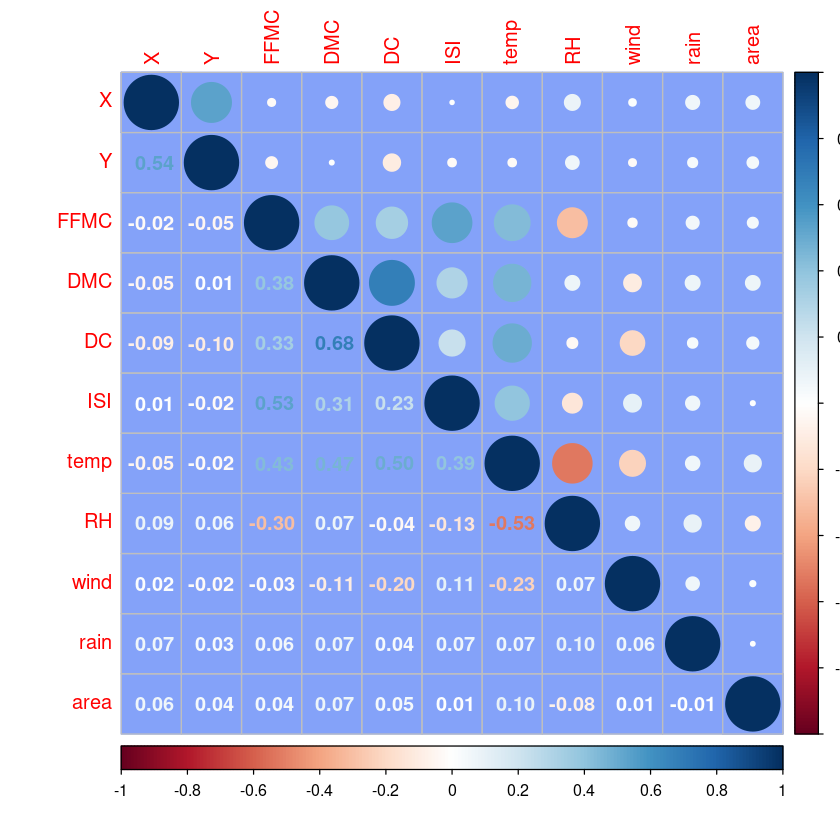

In [10]:
library(corrplot)

cor_ff <- cor(forest[,-c(3,4)])
# cor_ff

corrplot(cor_ff, method = "number", type = "lower", bg = "#84A2F9",add = FALSE, tl.pos = "lt") 
corrplot(cor_ff, method = "circle", type = "upper", bg = "#84A2F9",add = TRUE,  tl.col = "Blank")

In [11]:
library(e1071)

forest_skew <- sapply(forest[,-c(3,4)], skewness)
print(forest_skew)

          X           Y        FFMC         DMC          DC         ISI 
 0.03603577  0.41487792 -6.53749886  0.54432492 -1.09406780  2.52162669 
       temp          RH        wind        rain        area 
-0.32925302  0.85790328  0.56769205 19.70150380 12.77248266 


## Transformations 

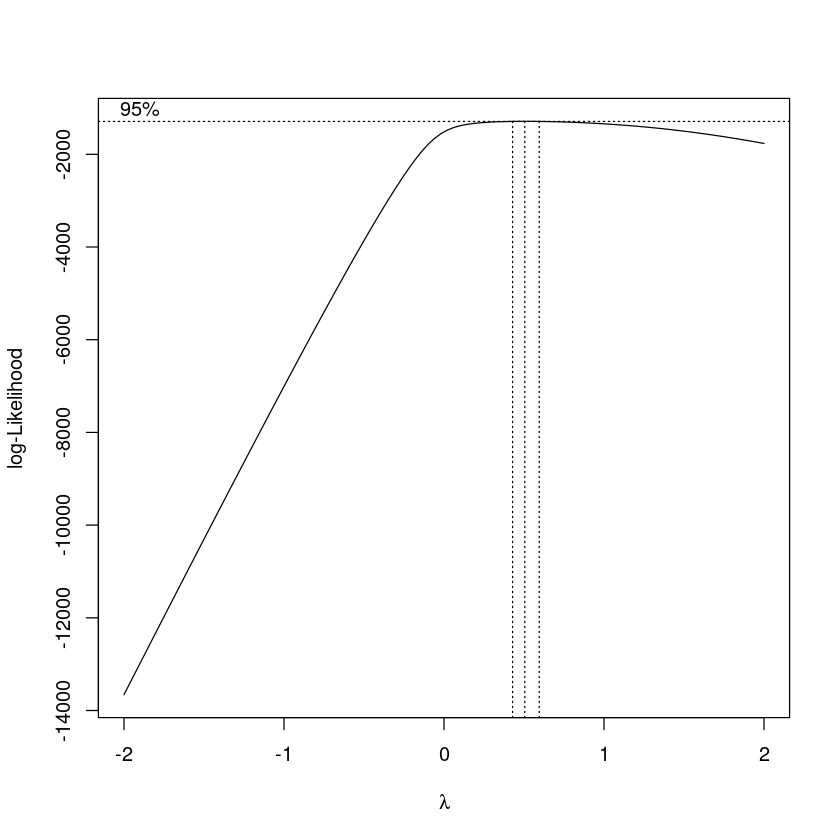

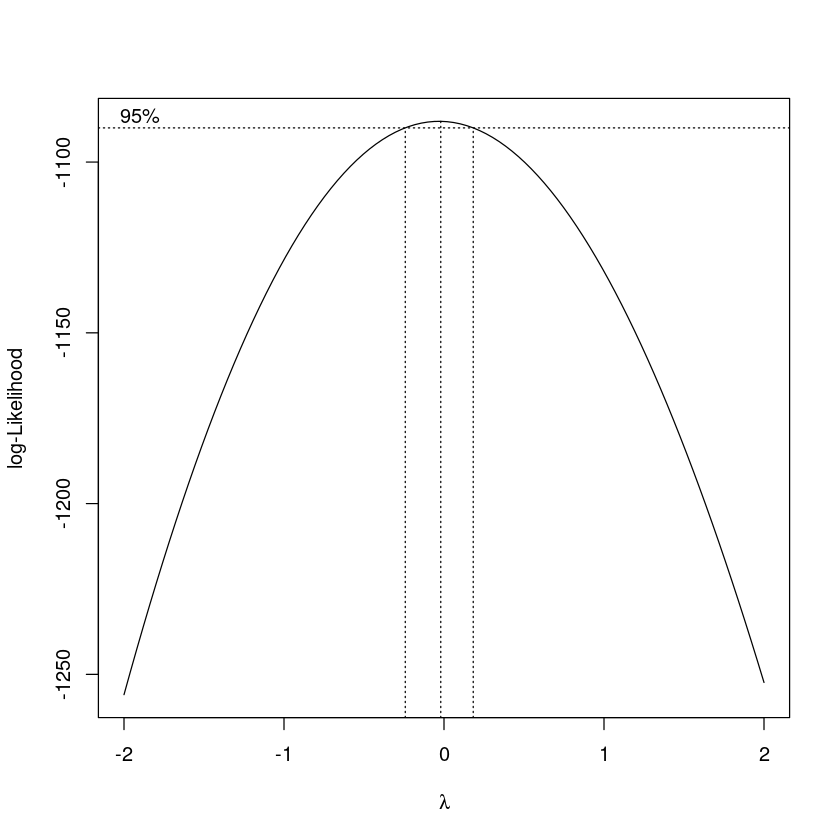

In [25]:
library(MASS)

forest <- read.csv("forestfires.csv")

dataset <- forest


# Box_DMC = boxcox(dataset$DMC ~ 1)
# lambda2 = Box_DMC$x[Box_DMC$y==max(Box_DMC$y)]
# # print(lambda2)
# sid2 = dataset$DMC^(lambda2)


dataset$ISI <- dataset$ISI + 1e-5
Box_ISI = boxcox(dataset$ISI ~ 1)
lambda3 = Box_ISI$x[Box_ISI$y==max(Box_ISI$y)]
# print(lambda3)
sid3 = dataset$ISI^(lambda3)
sid10 <- Winsorize(sid3, probs = c(0.05, 0.95))



Box_RH = boxcox(dataset$RH ~ 1)
lambda4 = Box_RH$x[Box_RH$y==max(Box_RH$y)]
# print(lambda4)
sid4 = dataset$RH^(lambda4)


# lambda2
# lambda3
# lambda4


# d <- data.frame(DMC = sid2)
f <- data.frame(ISI = sid10)
h <- data.frame(RH = sid4)

In [15]:
library(DescTools)
library(caret)

# rain
forest <- read.csv("forestfires.csv")
forest_s = data.frame(scale(forest[, -c(3,4)]))
data1 = spatialSign(forest_s)
# head(data1)
rain1 <- data1[,10]
rain2 <- Winsorize(rain1, probs = c(0.05, 0.95))
# print(skewness(rain2))
# par(mfrow = c(1,2))
# boxplot(rain2)
# hist(rain2)
# print(head(rain2))

j <- data.frame(rain = rain2)

In [16]:
# # area
forest <- read.csv("forestfires.csv")
forest_s = data.frame(scale(forest[, -c(3,4)]))
data5 = spatialSign(forest_s)
# head(data1)
area1 <- data5[,11]
# print(skewness(area1))
# par(mfrow = c(1,2))
# boxplot(area1)
# hist(area1)
# print(head(area1))



area2 <- Winsorize(area1, probs = c(0.05, 0.78))
# par(mfrow = c(1,2))
# boxplot(area2)
# hist(area2)
# print(skewness(area2))

k <- data.frame(area = area2)

In [17]:
# FFMC

forest <- read.csv("forestfires.csv")
forest_s = data.frame(scale(forest[, -c(3,4)]))
data2 = spatialSign(forest_s)
# head(data1)
FFMC1 <- data2[,3]
# print(skewness(FFMC1))
# par(mfrow = c(1,2))
# boxplot(FFMC1)
# hist(FFMC1)
# print(head(FFMC1))

FFMC2 <- Winsorize(FFMC1, probs = c(0.05, 0.99))
# print(skewness(FFMC2))
# par(mfrow = c(1,2))
# boxplot(FFMC2)
# hist(FFMC2)
# print(head(FFMC2))

c <- data.frame(FFMC = FFMC2)

In [18]:
#DC

forest <- read.csv("forestfires.csv")
forest_s = data.frame(scale(forest[, -c(3,4)]))
data3 = spatialSign(forest_s)
# head(data1)
DC1 <- data3[,3]
# print(skewness(DC1))
# par(mfrow = c(1,2))
# boxplot(DC1)
# hist(DC1)
# print(head(DC1))

DC2 <- Winsorize(DC1, probs = c(0.06, 0.99))
# print(skewness(DC2))
# par(mfrow = c(1,2))
# boxplot(DC2)
# hist(DC2)
# print(head(DC2))

e <- data.frame(DC = DC2)

In [23]:
forest <- read.csv("forestfires.csv")

a <- data.frame(X = forest[,1])
# head(a)

b <- data.frame(Y = forest[,2])
# head(b)

# head(c)

y <- data.frame(month = forest[,3])
# head(y)

z <- data.frame(day = forest[,4])
# head(z)

d <- data.frame(DMC = forest[,6])
# head(d)

# head(e)

# head(f)

g <- data.frame(temp = forest[,9])
# head(g)

# head(h)

i <- data.frame(wind = forest[,11])
# head(i)

# head(j)

#head(k)

In [27]:
forest_final <- cbind(a, b, y, z, c, d, e, f, g, h, i, j, k)
forest_num <- forest_final[, -c(3,4)]
forest_chr <- forest_final[,c(3,4)]

# min_max_scaling <- function(x) {
#   (x - min(x)) / (max(x) - min(x))
# }

# forest_t <- as.data.frame(lapply(forest_num, min_max_scaling))

# forest_final <- cbind(forest_t, forest_chr)
# forest_final

In [28]:
forest_t_skew <- sapply(forest_num, skewness)
print(forest_t_skew)

          X           Y        FFMC         DMC          DC         ISI 
 0.03603577  0.41487792 -0.67727545  0.54432492 -0.54474996 -0.05472982 
       temp          RH        wind        rain        area 
-0.32925302 -0.01043580  0.56769205 -0.54678974 -0.35461139 


## Visualization of data after transformations

ERROR: Error in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, : invalid color name 'Blank'


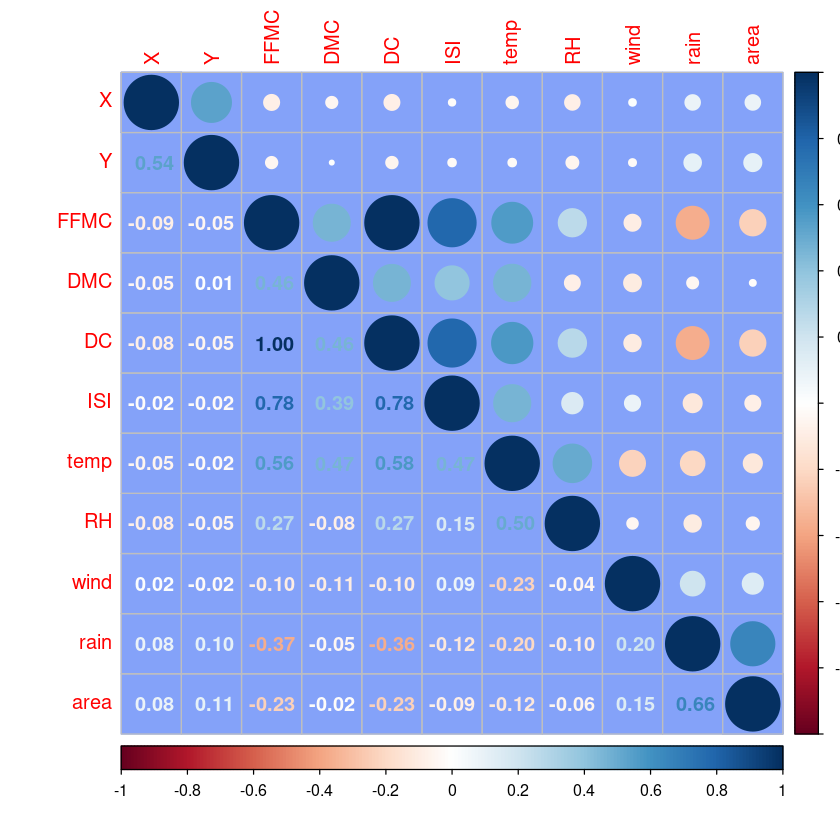

In [29]:
cor_fft <- cor(forest_num)
# cor_fft

corrplot(cor_fft, method = "number", type = "lower", bg = "#84A2F9",add = FALSE, tl.pos = "lt") 
corrplot(cor_fft, method = "circle", type = "upper", bg = "#84A2F9",add = TRUE,  tl.col = "Blank")

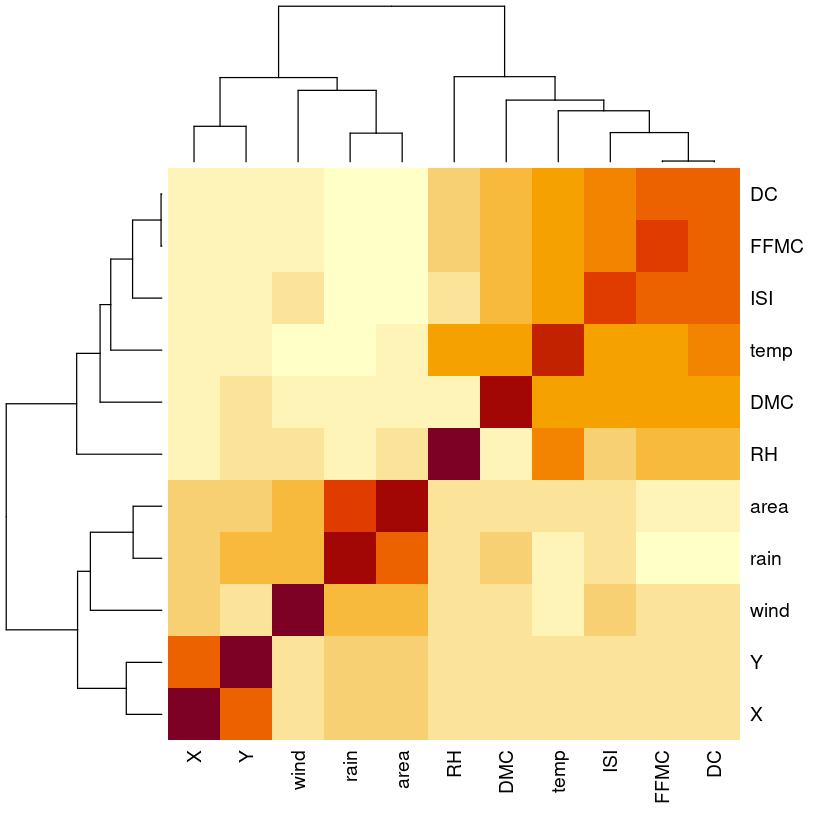

In [30]:
heatmap(cor_fft)

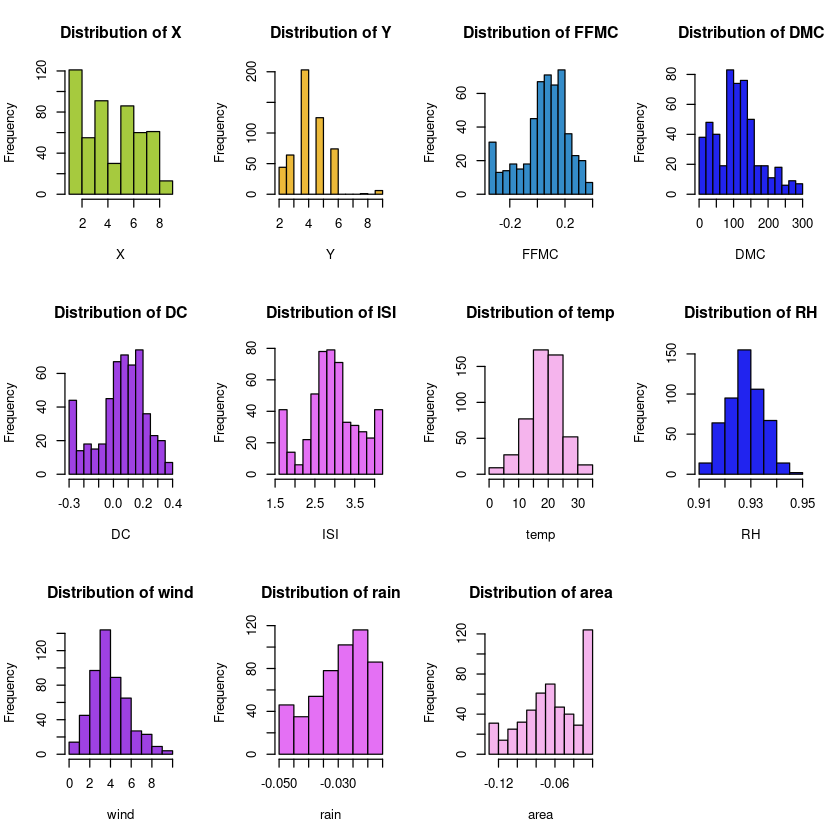

In [31]:
par(mfrow = c(3,4))

hist(forest_final$X, main="Distribution of X", xlab="X", col="#a6ca3e", border="#030303")

hist(forest_final$Y, main="Distribution of Y", xlab="Y", col="#ecb939", border="#030303")

# Remaining categorical variables

hist(forest_final$FFMC, main="Distribution of FFMC", xlab="FFMC", col="#348cc9", border="#030303")

hist(forest_final$DMC, main="Distribution of DMC", xlab="DMC", col="#2124ef", border="#030303")

hist(forest_final$DC, main="Distribution of DC", xlab="DC", col="#9e41e3", border="#030303")

hist(forest_final$ISI, main="Distribution of ISI", xlab="ISI", col="#e470f4", border="#030303")

hist(forest_final$temp, main="Distribution of temp", xlab="temp", col="#f5b4ed", border="#030303")

hist(forest_final$RH, main="Distribution of RH", xlab="RH", col="#2124ef", border="#030303")

hist(forest_final$wind, main="Distribution of wind", xlab="wind", col="#9e41e3", border="#030303")

hist(forest_final$rain, main="Distribution of rain", xlab="rain", col="#e470f4", border="#030303")

hist(forest_final$area, main="Distribution of area", xlab="area", col="#f5b4ed", border="#030303")

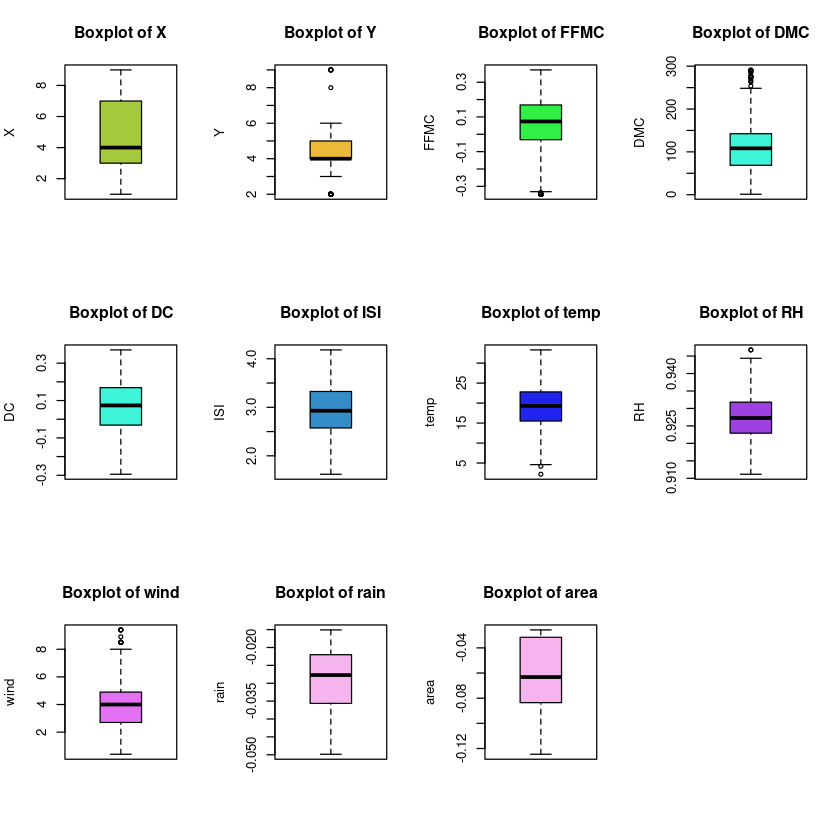

In [32]:
par(mfrow =c(3,4))

boxplot(forest_final$X, main="Boxplot of X", ylab="X", col="#a6ca3e")

boxplot(forest_final$Y, main="Boxplot of Y", ylab="Y", col="#ecb939")

boxplot(forest_final$FFMC, main="Boxplot of FFMC", ylab="FFMC", col="#30f045")

boxplot(forest_final$DMC, main="Boxplot of DMC", ylab="DMC", col="#3ef5da")

boxplot(forest_final$DC, main="Boxplot of DC", ylab="DC", col="#3ef5da")

boxplot(forest_final$ISI, main="Boxplot of ISI", ylab="ISI", col="#348cc9")

boxplot(forest_final$temp, main="Boxplot of temp", ylab="temp", col="#2124ef")

boxplot(forest_final$RH, main="Boxplot of RH", ylab="RH", col="#9e41e3")

boxplot(forest_final$wind, main="Boxplot of wind", ylab="wind", col="#e470f4")

boxplot(forest_final$rain, main="Boxplot of rain", ylab="rain", col="#f5b4ed")

boxplot(forest_final$area, main="Boxplot of area", ylab="area", col="#f5b4ed")

# MODEL IMPLEMENTATIONS

## LINEAR MODEL-1 : Linear Regression

In [33]:
library(caret)
set.seed(1723)
Time_split <- createDataPartition(forest_num$area, p = 0.80, list = FALSE)
train_data <- forest_num[Time_split, ]


test_data <- forest_num[-Time_split, ]

In [34]:
fit0 = lm(area ~ 1, data =train_data)

fit= lm(area~., data=train_data)

step(fit , direction='backward', scope=formula(fit0), trace=0)


Call:
lm(formula = area ~ rain, data = train_data)

Coefficients:
(Intercept)         rain  
  -0.004822     1.975208  


In [35]:
fit0 = lm(area ~ 1, data =train_data)

fit= lm(area~., data=train_data)

step(fit0 , direction='forward', scope=formula(fit), trace=1)

Start:  AIC=-2907.7
area ~ 1

       Df Sum of Sq     RSS     AIC
+ rain  1  0.151242 0.23020 -3115.8
+ FFMC  1  0.021436 0.36001 -2929.8
+ DC    1  0.021015 0.36043 -2929.3
+ wind  1  0.008641 0.37280 -2915.2
+ temp  1  0.006784 0.37466 -2913.2
+ Y     1  0.004947 0.37650 -2911.1
+ ISI   1  0.002828 0.37862 -2908.8
+ RH    1  0.002559 0.37889 -2908.5
<none>              0.38144 -2907.7
+ X     1  0.001008 0.38044 -2906.8
+ DMC   1  0.000220 0.38122 -2905.9

Step:  AIC=-3115.78
area ~ rain

       Df  Sum of Sq     RSS     AIC
<none>               0.23020 -3115.8
+ Y     1 0.00075449 0.22945 -3115.2
+ wind  1 0.00012523 0.23008 -3114.0
+ DMC   1 0.00006226 0.23014 -3113.9
+ X     1 0.00004208 0.23016 -3113.9
+ DC    1 0.00004046 0.23016 -3113.9
+ FFMC  1 0.00003680 0.23017 -3113.8
+ ISI   1 0.00002258 0.23018 -3113.8
+ RH    1 0.00001541 0.23019 -3113.8
+ temp  1 0.00000075 0.23020 -3113.8



Call:
lm(formula = area ~ rain, data = train_data)

Coefficients:
(Intercept)         rain  
  -0.004822     1.975208  


In [36]:
set.seed(1256)
cv_control <- trainControl(method = "cv", number = 10)

lm_model <- train(area ~ rain, data = train_data, method = "lm", trControl = cv_control)
summary(lm_model)
lm_predictions <- predict(lm_model, newdata = test_data)

postResample(lm_predictions, test_data$area)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035790 -0.017147 -0.009562  0.013670  0.077587 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.004822   0.003707  -1.301    0.194    
rain         1.975208   0.119765  16.492   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02358 on 414 degrees of freedom
Multiple R-squared:  0.3965,	Adjusted R-squared:  0.395 
F-statistic:   272 on 1 and 414 DF,  p-value: < 2.2e-16


RMSE   Rsquared        MAE 
0.01922767 0.63190124 0.01757706

## LINEAR MODEL-2 : REGULARIZATION MODEL

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


,alpha,lambda
,<dbl>,<dbl>
1,0,0.2


RMSE   Rsquared        MAE 
0.02761042 0.43125593 0.02244093

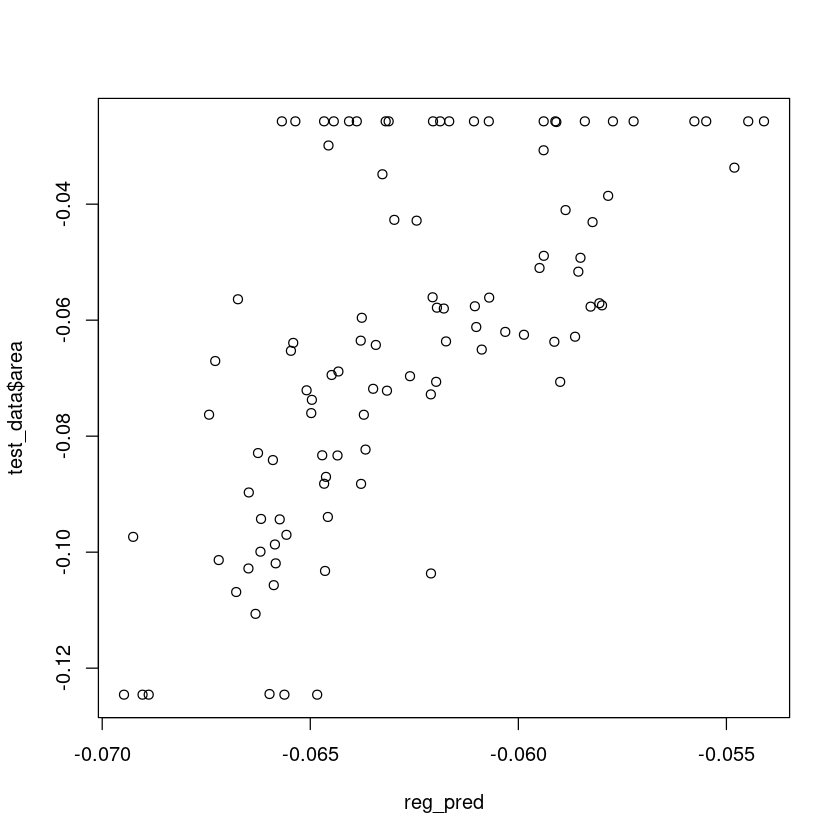

In [37]:
set.seed(965)
library(caret)

ctrl = trainControl(method="cv", number=5)

dgrid = data.frame( lambda =seq(0.2, 0.5, length=10), alpha=seq(0.0,1.0, length =10))
reg_model = train(area~., data=train_data, method="glmnet", tuneGrid=dgrid, trControl=ctrl)

reg_model $ bestTune

reg_pred = predict(reg_model, test_data)
plot(reg_pred, test_data$area)
                   

postResample(reg_pred, test_data$area)

## LINEAR MODEL-3 : Partial least squares regression

Partial Least Squares 

416 samples
 10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 374, 374, 374, 374, 374, 374, ... 
Resampling results across tuning parameters:

  ncomp  RMSE        Rsquared   MAE       
  1      0.02623910  0.2605435  0.02128795
  2      0.02399876  0.3749384  0.01933453
  3      0.02382741  0.3841497  0.01938158
  4      0.02383740  0.3834987  0.01945039
  5      0.02384400  0.3835515  0.01941566
  6      0.02383977  0.3836830  0.01941254
  7      0.02383406  0.3840479  0.01940429
  8      0.02382832  0.3843212  0.01940177
  9      0.02382672  0.3844263  0.01939856

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was ncomp = 9.

RMSE   Rsquared        MAE 
0.01933367 0.62202596 0.01749420

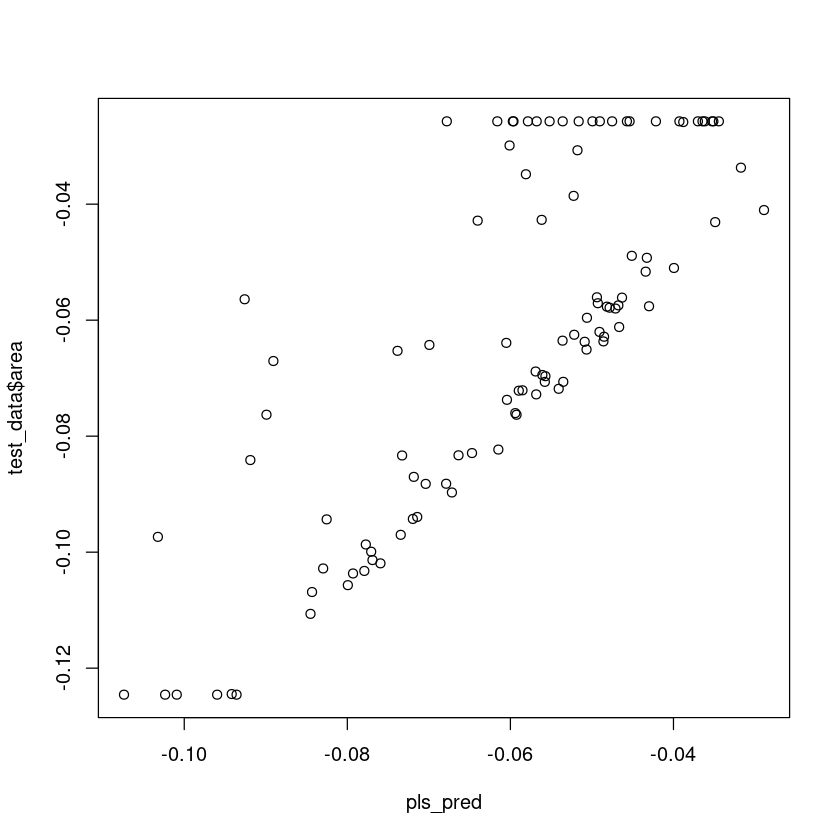

In [39]:
library(pls)

ctrl = trainControl(method = "cv", number = 10)
pls_model = train(area ~ ., data = train_data, method = "pls", 
                  preProc = c("center", "scale"), tuneLength = 10, trControl = ctrl)
pls_model

pls_pred = predict(pls_model, test_data, ncomp=1)
                  
                  
plot(pls_pred, test_data$area)

postResample(pls_pred, test_data$area)

## NON_LINEAR MODEL-1 : RANDOM FOREST

In [41]:
library(randomForest)

set.seed(965)

rf_model <- randomForest(area ~ ., data = train_data, ntree = 150, importance = TRUE)
summary(rf_model)

print(rf_model)

rf_predictions <- predict(rf_model, newdata = test_data)

postResample(rf_predictions, test_data$area)

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       416    -none- numeric  
mse             150    -none- numeric  
rsq             150    -none- numeric  
oob.times       416    -none- numeric  
importance       20    -none- numeric  
importanceSD     10    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               416    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     


Call:
 randomForest(formula = area ~ ., data = train_data, ntree = 150,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 150
No. of variables tried at each split: 3

          Mean of squared residuals: 0.0006491425
                    % Var explained: 29.21


RMSE   Rsquared        MAE 
0.02068080 0.56853413 0.01812407

        %IncMSE IncNodePurity
X     3.8685388   0.017780933
Y    -0.1686069   0.008237167
FFMC  3.3653406   0.025205411
DMC   5.3730698   0.034649202
DC    3.6794038   0.027512558
ISI   5.0287427   0.025423784
temp  5.1310664   0.037906589
RH   -1.2014288   0.024562652
wind  4.2066602   0.019499503
rain 19.7925750   0.132053357


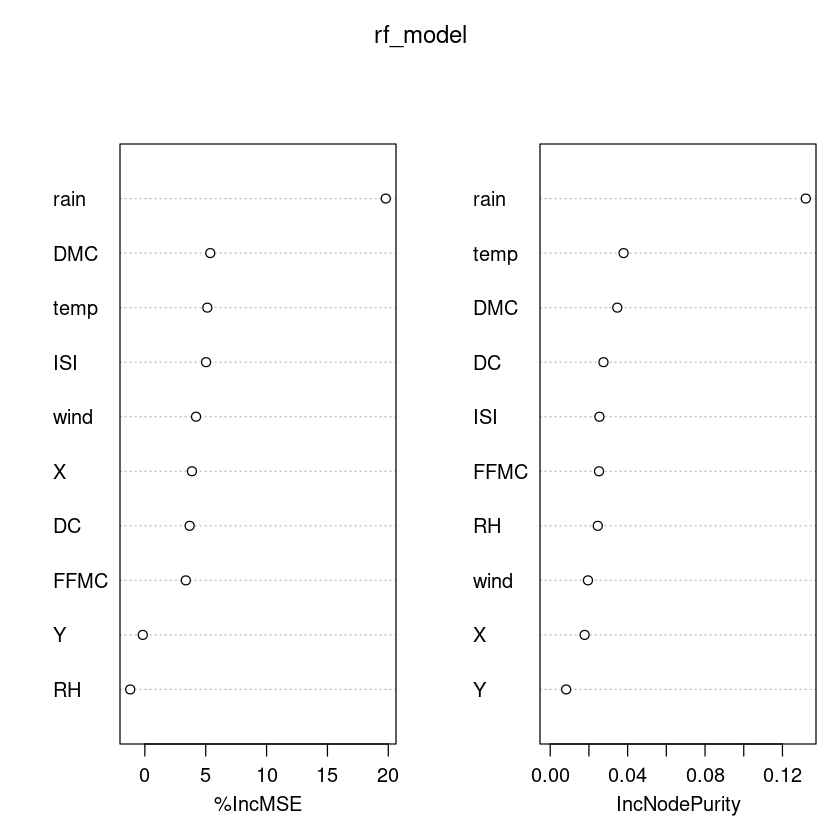

In [42]:
importance <- importance(rf_model)
print(importance)
varImpPlot(rf_model)

## NON-LINEAR MODEL-2 : Gradient Boosting Machines

In [43]:
set.seed(1269)
gbmGrid <- expand.grid(interaction.depth = c(1, 3, 5, 7), n.trees = seq(50, 300, by = 50), 
                       shrinkage = c(0.01, 0.1, 0.2), n.minobsinnode = c(10, 20))

trcn <- trainControl(method = "cv", number = 10, verboseIter = TRUE)

gbm.fit <- train(area ~ ., data = train_data, method = "gbm", 
                 tuneGrid = gbmGrid, trControl = trcn, metric = "RMSE")
gbm.fit$bestTune


yhat <- predict(gbm.fit, newdata = test_data)

postResample(yhat, test_data$area)

# caret::MAE(test_data$winsor_area, yhat)
# #RMSE on the testing data of the fitted model
# caret::RMSE(test_data$winsor_area, yhat)
# #Plot the predicted value agaisnt the observed value
# plot(yhat, test_data$winsor_area)

+ Fold01: shrinkage=0.01, interaction.depth=1, n.minobsinnode=10, n.trees=300 
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0.0009            -nan     0.0100    0.0000
     2        0.0009            -nan     0.0100    0.0000
     3        0.0009            -nan     0.0100    0.0000
     4        0.0009            -nan     0.0100    0.0000
     5        0.0009            -nan     0.0100    0.0000
     6        0.0009            -nan     0.0100    0.0000
     7        0.0009            -nan     0.0100    0.0000
     8        0.0009            -nan     0.0100    0.0000
     9        0.0009            -nan     0.0100    0.0000
    10        0.0009            -nan     0.0100    0.0000
    20        0.0008            -nan     0.0100    0.0000
    40        0.0008            -nan     0.0100    0.0000
    60        0.0007            -nan     0.0100    0.0000
    80        0.0007            -nan     0.0100    0.0000
   100        0.0006            -nan     0.0100    

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
6,300,1,0.01,10


RMSE   Rsquared        MAE 
0.02000816 0.62431848 0.01796165

Loaded gbm 2.1.8.1



gbm(formula = area ~ ., distribution = "gaussian", data = train_data, 
    n.trees = 100, interaction.depth = 3, n.minobsinnode = 10, 
    shrinkage = 0.1, cv.folds = 5)
A gradient boosted model with gaussian loss function.
100 iterations were performed.
The best cross-validation iteration was 21.
There were 10 predictors of which 9 had non-zero influence.

Using 21 trees...




RMSE   Rsquared        MAE 
0.01992267 0.64326467 0.01771189

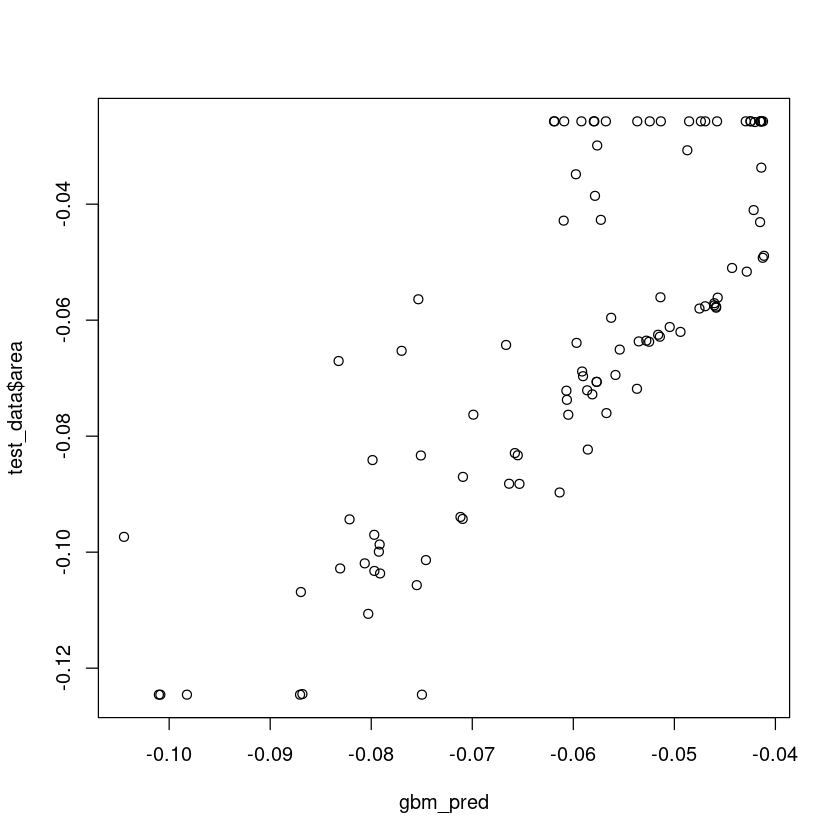

In [44]:
library(gbm)
set.seed(1269)
gbm_model <- gbm(area ~ ., data = train_data, distribution = "gaussian", n.trees = 100, shrinkage = 0.1, 
                interaction.depth = 3, n.minobsinnode = 10, cv.folds = 5)
gbm_model


best <- which.min(gbm_model$cv.error)
# sqrt(gbm_model$cv.error[best])


gbm_pred = predict(gbm_model, test_data)

postResample(gbm_pred, test_data$area)
plot(gbm_pred, test_data$area)

## NON LINEAR MODEL-3 :  SVM

,sigma,C
,<dbl>,<dbl>
1,0.01,0.25


RMSE   Rsquared        MAE 
0.02082622 0.57877556 0.01590966

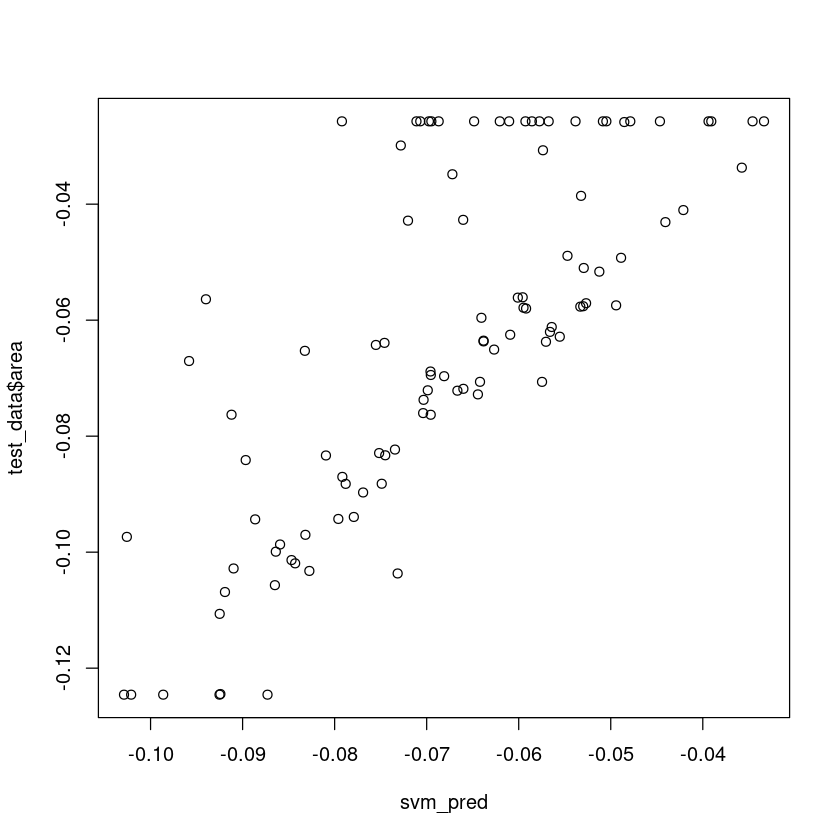

In [45]:
set.seed(325)

cv.control = trainControl(method = "cv", number = 5)

h_grid <- expand.grid(C = c(0.25, .5, 0.75, 1, 1.5, 2.0), sigma = c(0.01, 0.05, 0.1, 0.15, 0.2))

svm_model = train(area ~ ., data = train_data, method = "svmRadial", trControl = cv.control, 
                 trace = FALSE, tuneGrid = h_grid
                # preProc = c("center", "scale"),
                # maxit = 500
                 )

svm_model$bestTune

svm_pred = predict(svm_model, test_data)
plot(svm_pred, test_data$area)

postResample(svm_pred, test_data$area)

## NON LINEAR MODEL-4 : MARS

Loading required package: earth

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos



Multivariate Adaptive Regression Spline 

416 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 375, 374, 374, 374, 376, 376, ... 
Resampling results across tuning parameters:

  degree  nprune  RMSE        Rsquared   MAE       
  1       10      0.02394282  0.3862917  0.01940662
  1       13      0.02394282  0.3862917  0.01940662
  1       15      0.02394282  0.3862917  0.01940662
  1       17      0.02394282  0.3862917  0.01940662
  1       20      0.02394282  0.3862917  0.01940662
  2       10      0.02407786  0.3788106  0.01920130
  2       13      0.02407786  0.3788106  0.01920130
  2       15      0.02407786  0.3788106  0.01920130
  2       17      0.02407786  0.3788106  0.01920130
  2       20      0.02407786  0.3788106  0.01920130

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 10 and degree = 1.

,nprune,degree
,<dbl>,<int>
1,10,1


RMSE   Rsquared        MAE 
0.01934626 0.62238422 0.01730494

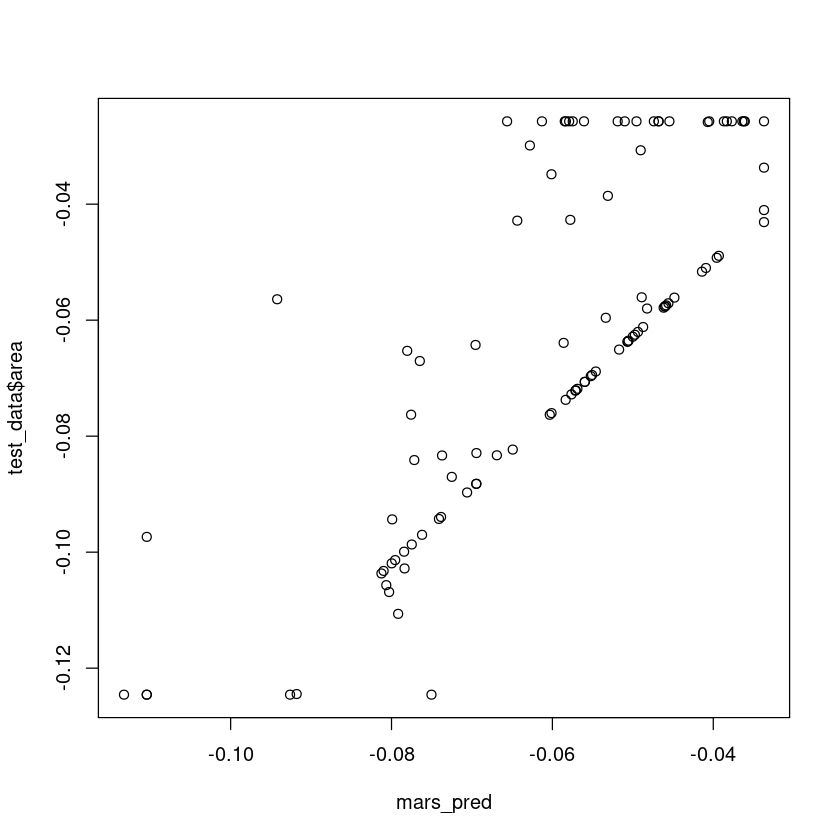

In [46]:
set.seed(263)

cv.control = trainControl(method = "cv", number = 10)

hyper_grid <- expand.grid(degree = 1:2, nprune = c(10, 13, 15, 17, 20))

mars_model = train(area ~ ., data = train_data, method = "earth", trControl = cv.control, 
                 trace = FALSE, tuneGrid = hyper_grid
                # preProc = c("center", "scale"),
                # maxit = 500
                )
mars_model
mars_model$bestTune

mars_pred = predict(mars_model, test_data)
plot(mars_pred, test_data$area)

postResample(mars_pred, test_data$area)

## NON LINEAR MODEL-5 : kNN Regression

RMSE   Rsquared        MAE 
0.01934626 0.62238422 0.01730494

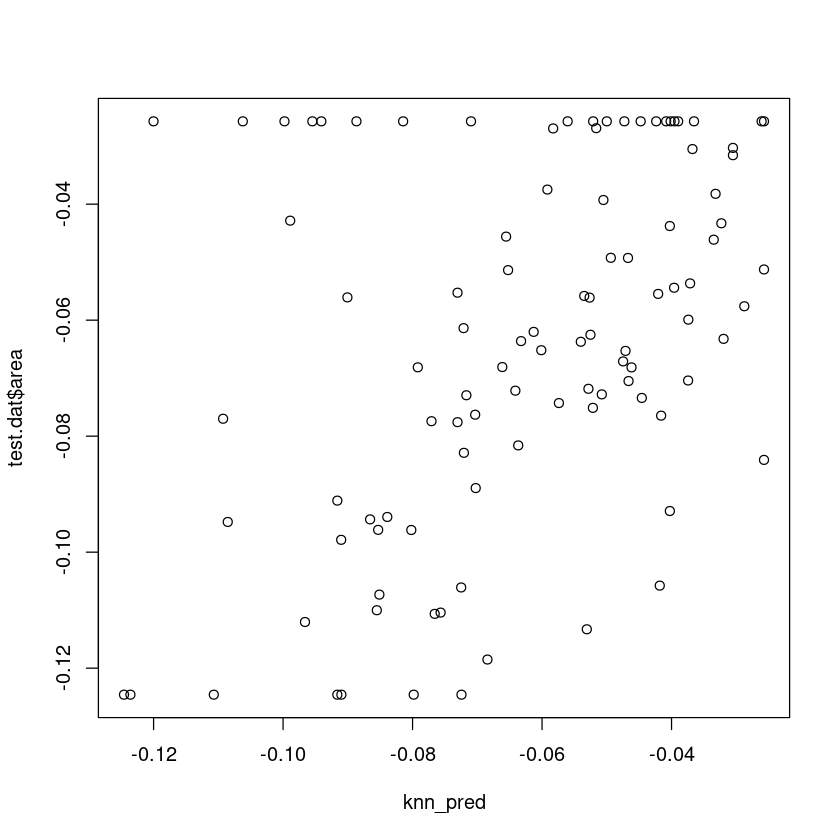

In [47]:
set.seed(7856)


forest_scale = forest_num %>% mutate_all(scale)

forest_scale$area = forest_num$area
index = createDataPartition(forest_scale$area, p = 0.8, list = FALSE)
train.dat = forest_scale[index,]
test.dat = forest_scale[-index,]

X = train.dat[,-11]
y = train.dat[, 11]

knn_model = knnreg(X, y, k=3)


knn_pred = predict(knn_model, test.dat[,-11])
plot(knn_pred, test.dat$area)


postResample(mars_pred, test_data$area)

## NON LINEAR MODEL-6 : Neural Networks(ensamble methods-avNNet)

RMSE   Rsquared        MAE 
0.07096855 0.38728689 0.06877862

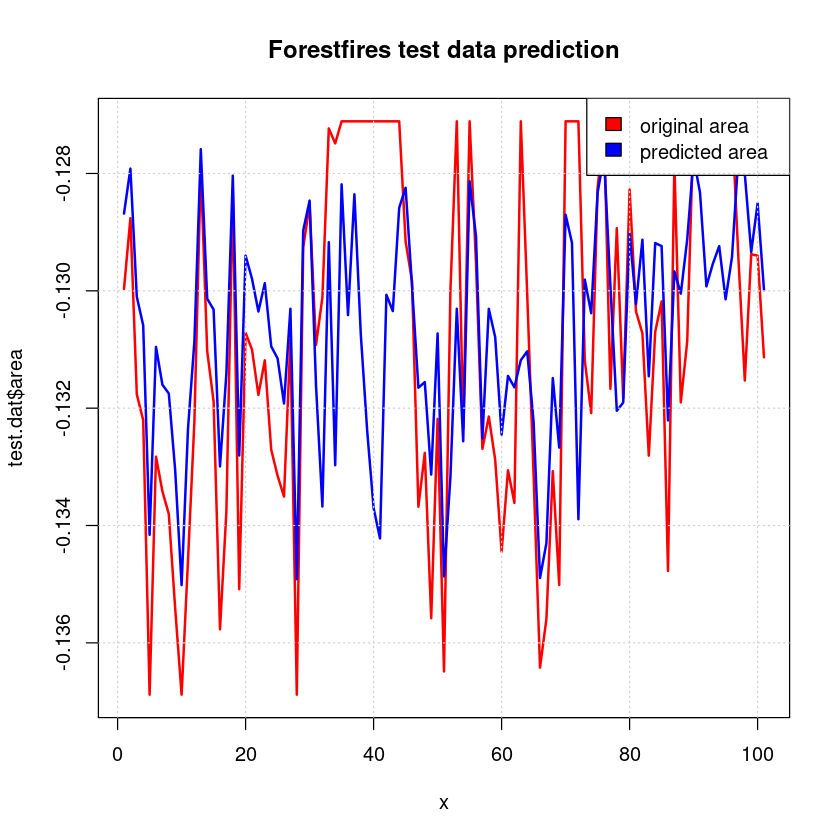

In [48]:
set.seed(256)
library(nnet)
scale.fun = function(x){
    (x-min(x)/(max(x)-min(x)))
}
miny = min(forest_num$area)
range.y = max(forest_num$area) - miny

forest_scale = forest_num %>% mutate_all(scale.fun)

forest_scale$area = forest_num$area
index = createDataPartition(forest_scale$area, p = 0.8, list = FALSE)
train.dat = forest_scale[index,]
test.dat = forest_scale[-index,]


ctrl = trainControl(method = 'cv', number =10)

nnet.Grid = expand.grid(decay = c(0,0.01,0.05,0.1), size = 1:6, bag = FALSE)

avn_model = train(area ~., data = train.dat, method = 'avNNet', tuneGrid = nnet.Grid,
                 trControl = ctrl, preProc = c('center', 'scale'), linout = TRUE,
                 trace = FALSE, maxit = 100, allowParallel = FALSE)

avn_pred = predict(avn_model, test.dat)
yhat0 = avn_pred*range.y + miny
test.dat$area = test.dat$area*range.y + miny

postResample(avn_pred, test.dat$area)

x = 1:(length(yhat0))
plot(x, test.dat$area, col = 'red', type = 'l', lwd =2, 
     main = "Forestfires test data prediction",
     ylim = range(c(test.dat$area, yhat0)))

lines(x, yhat0, col = 'blue', lwd =2)
legend('topright', legend = c('original area', 'predicted area'),
       fill =c('red','blue'),col = 2:3, adj = c(0,0.6))
grid()